# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah Brazilian E-Commerce Public Dataset by Olist. Dataset ini berisi 100 ribu pesanan dari tahun 2016 hingga 2018 di berbagai marketplace di Brasil. Fokus proyek ini adalah memprediksi Customer Lifetime Value (CLV) menggunakan pendekatan regresi berdasarkan riwayat transaksi pelanggan (Recency, Frequency, Monetary).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
# 1. Instalasi library
!pip install mlflow==2.19.0 dagshub pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dagshub
import mlflow
from datetime import timedelta

# 2. Inisialisasi DagsHub (Klik tautan/pop-up yang muncul untuk Authorize)
dagshub.init(repo_owner='hudan-maulana', repo_name='Eksperimen_SML_Hudan-Maulana', mlflow=True)

print("Environment Colab Siap!")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=79e84702-b1cf-48a7-b19f-b1c33cc5f799&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=fa2413f4d2d0763b588af4c7e0f80d6181253f03e140aaf28457251a1a2ff1c9




Accessing as hooddz1

Repository Eksperimen_SML_Hudan-Maulana doesn't exist, creating it under current user.

Initialized MLflow to track repo "hudan-maulana/Eksperimen_SML_Hudan-Maulana"

Repository hudan-maulana/Eksperimen_SML_Hudan-Maulana initialized!

Environment Colab Siap!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
import pandas as pd

# Memuat tabel
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

# 1. Gabungkan Orders, Items, dan Customers
df = orders.merge(items, on='order_id').merge(customers, on='customer_id')

# 2. Ambil payment_value dan payment_installments dari tabel payments
order_payments_agg = payments.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_installments': 'max'
}).reset_index()

# 3. Gabungkan ke dataframe utama
df = df.merge(order_payments_agg, on='order_id')

# 4. Filter status 'delivered'
df = df[df['order_status'] == 'delivered']

print("Dataset siap dan sudah tergabung king ")
df.head()


Dataset siap dan sudah tergabung king 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_value,payment_installments
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,3
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,72.20,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,28.62,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

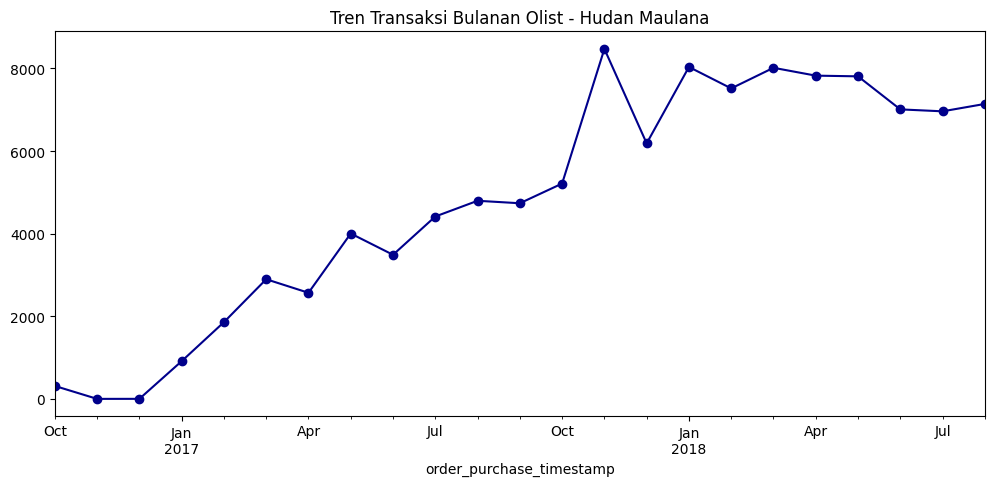

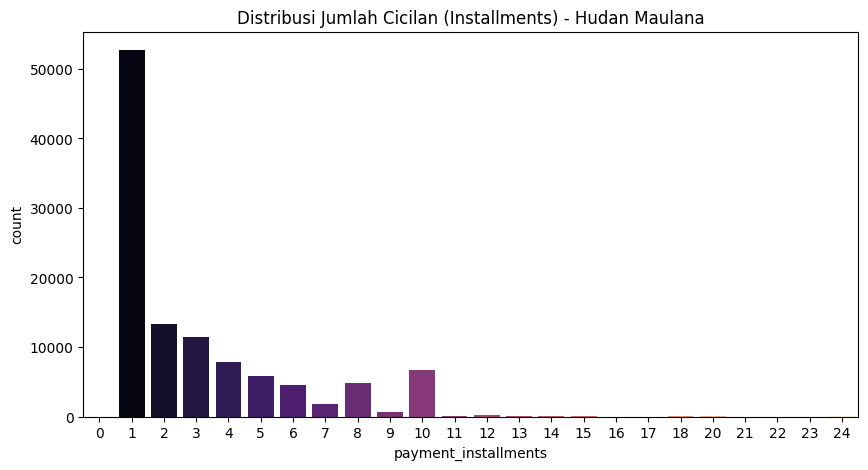

/tmp/ipython-input-796489202.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['payment_installments'] <= 12], x='payment_installments', y='payment_value', palette='Set3')


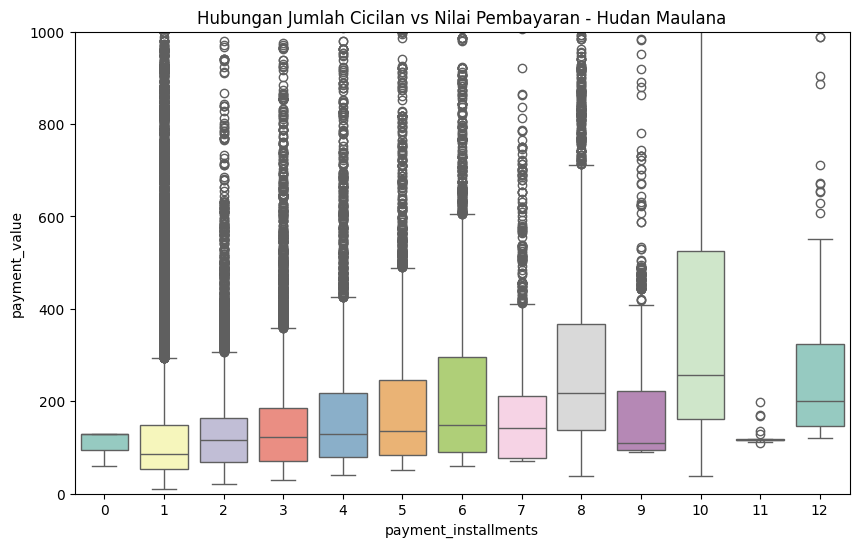

Statistik Deskriptif Kolom Numerik:


,price,payment_value,payment_installments
count,110194.000000,110194.000000,110194.000000
mean,119.982605,179.466763,3.015373
std,182.301508,271.338343,2.800669
min,0.850000,9.590000,0.000000
25%,39.900000,65.600000,1.000000
50%,74.900000,114.345000,2.000000
75%,134.192500,194.960000,4.000000
max,6735.000000,13664.080000,24.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tren Transaksi Bulanan
plt.figure(figsize=(12, 5))
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.set_index('order_purchase_timestamp').resample('ME').size().plot(marker='o', color='darkblue')
plt.title('Tren Transaksi Bulanan Olist - Hudan Maulana')
plt.show()

# 2. Distribusi Cicilan Pembayaran (Fitur Baru)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='payment_installments', palette='magma', hue='payment_installments', legend=False)
plt.title('Distribusi Jumlah Cicilan (Installments) - Hudan Maulana')
plt.show()

# 3. Analisis Hubungan: Jumlah Cicilan vs Total Pembayaran
# Ini penting untuk melihat apakah cicilan tinggi berkorelasi dengan belanja besar
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['payment_installments'] <= 12], x='payment_installments', y='payment_value', palette='Set3')
plt.title('Hubungan Jumlah Cicilan vs Nilai Pembayaran - Hudan Maulana')
plt.ylim(0, 1000) # Membatasi agar boxplot tidak tertekan oleh outlier ekstrim
plt.show()

# 3. Statistik Deskriptif (Sudah diperbaiki)
print("Statistik Deskriptif Kolom Numerik:")
display(df[['price', 'payment_value', 'payment_installments']].describe())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
from datetime import timedelta

# 1. Menentukan Snapshot Date
# Kita ambil H+1 dari transaksi terakhir di dataset untuk menghitung 'Recency'
snapshot_date = df['order_purchase_timestamp'].max() + timedelta(days=1)

# 2. Membuat Fitur RFM (Kriteria 1 - Advanced)
# Recency: Jumlah hari sejak transaksi terakhir
# Frequency: Jumlah pesanan unik yang pernah dilakukan
# Monetary: Total uang yang dikeluarkan (CLV Target)
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

# Menamai ulang kolom agar jelas
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# 3. Handling Outlier (Penting untuk Model Regresi)
# Berdasarkan EDA tadi, data monetary memiliki outlier ekstrim.
# Kita ambil data di bawah persentil 95 untuk menjaga stabilitas model.
q_limit = rfm['monetary'].quantile(0.95)
rfm_final = rfm[rfm['monetary'] <= q_limit].reset_index(drop=True)

# 4. Menyimpan Hasil Akhir (Export)
rfm_final.to_csv('processed_clv.csv', index=False)

print("--- Hasil Akhir Preprocessing ---")
print(f"Jumlah data awal: {len(rfm)}")
print(f"Jumlah data setelah filter outlier: {len(rfm_final)}")
print(f"Batas nilai Monetary (95%): {q_limit:.2f}")
print("\nFile 'processed_clv.csv' berhasil dibuat!")
rfm_final.head()

--- Hasil Akhir Preprocessing ---
Jumlah data awal: 93357
Jumlah data setelah filter outlier: 88689
Batas nilai Monetary (95%): 658.84

File 'processed_clv.csv' berhasil dibuat!


,customer_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
